# Importation des librairies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Paramétrage

In [2]:
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# Importation et exploration des Datasets

# I - Importons nos datasets et voyons un premier aperçu des données

In [100]:
df_train = pd.read_csv('resources/news.csv')

In [102]:
df_train.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# II - Visualisons ensuite la distribution du dataset d'entrainement

In [104]:
target = df_train.label
distribution= df_train.label.value_counts()
distribution

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

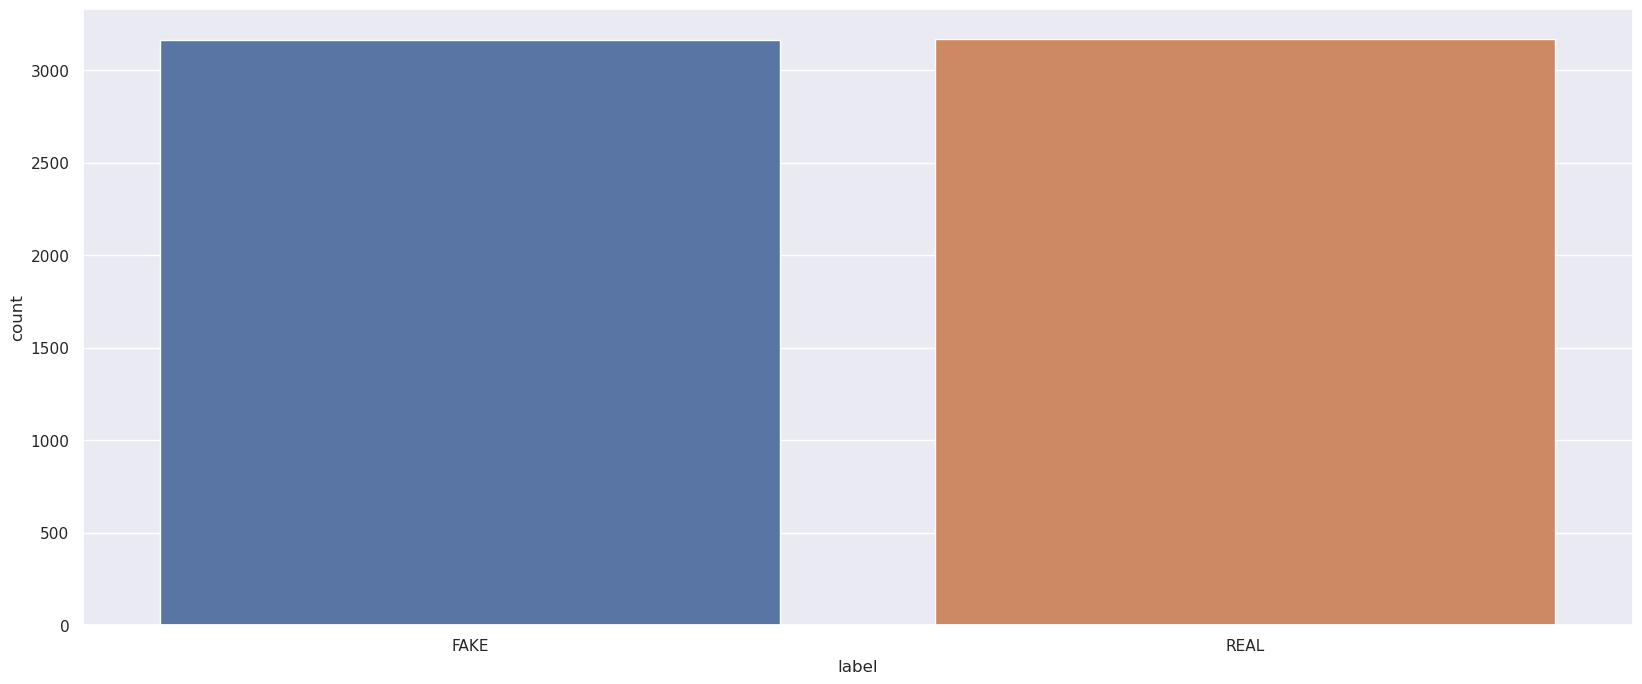

In [111]:
sns.countplot(x ='label', data = df_train)
plt.show()

### Nous pouvns constater que il y a autant de fake news que de real news.

# Initialisation d'un TfidfVectorizer

#### Afin de pouvoir entrainer les données nous les séparons les données en 4

In [162]:
x_train,x_test,y_train,y_test=train_test_split(df_train.text, target, test_size=0.2, random_state=7)

#### Initialisons un TfidfVectorizer par défaut. Un TfidfVectorizer transforme une collection de documents bruts en une matrice de fonctionnalités TF-IDF. Maintenant, ajustez et transformez le vectoriseur sur le train et transformez le vectoriseur sur le jeu de test.

In [163]:
#Initialisation du TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()

#Ajustement et transformation du des données d'entrainement, transformation des données de test
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

##### Nous allons utiliser différents algorithme d'apprentissage automatique en donnant le niveau de précision obtenue.

##### La régression logistique

In [164]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression () 
LR. fit (tfidf_train, y_train)


LogisticRegression()

In [165]:
pred_lr = LR.predict(tfidf_test) # Construction du modèle de prédiction
print("Précision: {:.2f}%".format(LR.score(tfidf_test,y_test)*100))

Précision: 91.55%


#### L'abre de décision

In [166]:
from sklearn import tree
DT = tree.DecisionTreeClassifier ()
DT.fit(tfidf_train, y_train)

DecisionTreeClassifier()

In [167]:
pred_dt = DT.predict(tfidf_test) # Construction du modèle de prédiction
print("Précision: {:.2f}%".format( DT.score(tfidf_test,y_test)*100))

Précision: 81.22%


#### Le Gradient Boosting Machine

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier (random_state=0)
GB.fit(tfidf_train, y_train)

GradientBoostingClassifier(random_state=0)

In [169]:
pred_gb = GB.predict(tfidf_test) # Construction du modèle de prédiction
print("Précision: {:.2f}%".format( GB.score(tfidf_test,y_test)*100))

Précision: 89.90%


#### La classification de forêt aléatoire

In [170]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier (random_state=0)
RF.fit(tfidf_train, y_train)

RandomForestClassifier(random_state=0)

In [171]:
pred_rf= RF.predict(tfidf_test) # Construction du modèle de prédiction
print("Précision: {:.2f}%".format( RF.score(tfidf_test,y_test)*100))

Précision: 90.21%


### Nous constatons pour chaque modèle d'apprentissage nous avons une précision supérieur à 80% dont le meilleur est celui construit avec sur la regression logistique. 

# Detection de fake news

### A travers les modèles de prédiction nous pouvons alors détecter des fakes news

In [182]:
# Fonction pour le nétoyage des données
def wordopt (text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", '', text)
    text = re.sub('https?://\S+/www\.\S+', '', text)
    text = re.sub ('<.*?>+','', text)
    text = re.sub('[%s] % re.escape(string.punctuation)', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\ w*\d\w*', '', text)
    return text

# Fonction données la prédiction
def output_lable(n):
    if n == "FAKE":
        return "Fake News" 
    elif n == "REAL":
        return "Not A Fake News"
    
# Fonction principal de détection
def test_fake_news(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame (testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf_vectorizer.transform(new_x_test)
    pred_L = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}" . format(output_lable(pred_L[0]),output_lable(pred_DT[0]),output_lable(pred_GB[0]) ,output_lable(pred_RF[0])))


## Test et Résultat

In [176]:
news = str(input())
test_fake_news(news)

 On the eve of the presidential election, Hillary Clinton appears to be opening up some daylight between her and Donald Trump in the final round of national opinion surveys.  This shouldn't come as a total surprise, since a glance at the past six months of polls show that every time it looks like Mr Trump is going to surpass his Democratic opponent in the standings, the trend reverses itself.  The American people, perhaps, could never quite get their heads around the prospect of a Trump presidency, and countervailing forces asserted themselves every time it looks like that might be a reality.  If that's the case here, then the timing may be just right for a comfortable Clinton win.  None of the polls, of course, take account of how voters are reacting to the FBI clearing Clinton of criminality on the latest batch of emails. Here's my blog on how that twist may impact the election.




LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News


In [178]:
news = str(input())
test_fake_news(news)

 In a stunning election night, the Republican nominee for president, Donald Trump, secured victory after a string of formerly Democratic states swung his way.  Pennsylvania, Florida, Ohio, Wisconsin, Iowa and Michigan all turned red.  Nationally, Donald Trump won 47% of the vote to Hillary Clinton's 48% - yet this translated into 306 electoral college votes for the Republicans and 232 for the Democrats.




LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News


In [179]:
news = str(input())
test_fake_news(news)

 Donald Trump has secured the Republican nomination for US president on day two of the Republican National Convention.  The House Speaker, Paul Ryan, urged delegates to unite behind Mr Trump, a day after splits in the party were evident as the convention opened.  The Trump campaign also faces accusations a speech by Mr Trump's wife Melania on Monday was plagiarised.  Tuesday's speakers focused almost exclusively on attacking Hillary Clinton, the likely Democratic nominee.  New Jersey Governor Chris Christie, a former prosecutor, held a mock trial for Mrs Clinton as the crowd chanted "lock her up".  Mr Christie and others criticised Mrs Clinton's use of a private email account while she was serving as secretary of state.  An FBI investigation said she was "extremely careless" but found her actions didn't warrant criminal prosecution. However, Mr Christie and and the crowd disagreed as Mr Christie repeatedly yelled "guilty".  He said she has "selfish, awful judgement" and was to blame fo



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GB Prediction: Not A Fake News 
RF Prediction: Not A Fake News
